<a href="https://colab.research.google.com/github/JacopoMangiavacchi/TF-PyTorch-LinearRegression/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import PyTorch and TensorFlow

In [1]:
%tensorflow_version 2.x

In [2]:
import tensorflow as tf
print(f"tensorflow version: {tf.__version__}")

tensorflow version: 2.3.0


In [3]:
import torch
print(f"pytorch version: {torch.__version__}")

pytorch version: 1.6.0+cu101


# Generating the datasets

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def generate_data(m=0.1, b=0.3, n=200):
    x = tf.random.uniform(shape=(n,),minval=-10,maxval=10) 
    noise = tf.random.normal(shape=(len(x),), stddev=0.15)
    y = (m * x + b ) + noise
    return x, y

## Data Visualization

Text(0, 0.5, 'y')

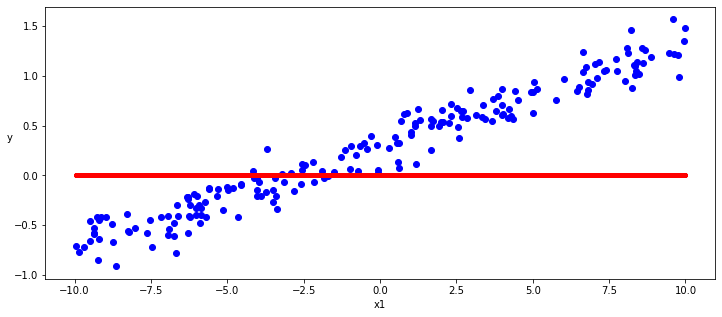

In [6]:
m = tf.Variable(0.)
b = tf.Variable(0.)
x, y = generate_data()
plt.figure(figsize = (12,5))
ax = plt.subplot(111)
ax.scatter(x,y, c = "b", label="samples")
ax.plot(x,m*x+b,"-r",linewidth = 5.0,label = "model")
plt.xlabel("x1")
plt.ylabel("y",rotation = 0)

# TensorFlow Model

In [7]:
class LinearRegressionKeras:
    def __init__(self):
        self.params = {
            "w" : tf.Variable(0.),
            "b" : tf.Variable(0.)
        }        

    def __call__(self,x): 
        y_pred = self.params["w"] * x + self.params["b"]
        return y_pred

# PyTorch Model

In [8]:
# class LinearRegressionPyTorch(torch.nn.Module): 
#     def __init__(self): 
#         super(LinearRegressionPyTorch, self).__init__() 
#         self.w = torch.tensor([0.0])
#         self.b = torch.tensor([0.0])
  
#     def forward(self, x):  
#         return x @ self.w + self.b
    
    
class LinearRegressionPyTorch(torch.nn.Module):
    def __init__(self):
        super(LinearRegressionPyTorch, self).__init__()
        self.linear = torch.nn.Linear(1, 1)  

    def forward(self, x):
        out = self.linear(x)
        return out

# TensorFlow Training

In [9]:
epochs = 500
learning_rate = 0.001

In [10]:
def squared_error(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

tf_model = LinearRegressionKeras()

for epoch in tf.range(1,epochs):
    with tf.GradientTape() as tape:
        predictions = tf_model(x)
        loss = squared_error(predictions, y)
    dloss_dw,dloss_db = tape.gradient(loss, [tf_model.params["w"], tf_model.params["b"]])
    # adjusting 
    tf_model.params["w"].assign(tf_model.params["w"] - learning_rate*dloss_dw)
    tf_model.params["b"].assign(tf_model.params["b"] - learning_rate*dloss_db)
    if epoch % 20 == 0:
        print(f"Step {epoch}, Loss {loss.numpy()}") # we print the loss only each 20 epochs

Step 20, Loss 0.12222025543451309
Step 40, Loss 0.09338047355413437
Step 60, Loss 0.086237333714962
Step 80, Loss 0.08090321719646454
Step 100, Loss 0.07606013119220734
Step 120, Loss 0.07159411162137985
Step 140, Loss 0.06747126579284668
Step 160, Loss 0.06366492807865143
Step 180, Loss 0.06015077233314514
Step 200, Loss 0.05690639093518257
Step 220, Loss 0.05391105264425278
Step 240, Loss 0.051145657896995544
Step 260, Loss 0.048592545092105865
Step 280, Loss 0.04623541980981827
Step 300, Loss 0.044059231877326965
Step 320, Loss 0.04205010458827019
Step 340, Loss 0.04019520804286003
Step 360, Loss 0.03848268836736679
Step 380, Loss 0.03690164163708687
Step 400, Loss 0.03544195741415024
Step 420, Loss 0.03409433737397194
Step 440, Loss 0.03285015746951103
Step 460, Loss 0.03170148655772209
Step 480, Loss 0.030640985816717148


# PyTorch Training

In [11]:
inputs = torch.autograd.Variable(torch.from_numpy(x.numpy().reshape(-1, 1)))
labels = torch.autograd.Variable(torch.from_numpy(y.numpy().reshape(-1, 1)))


In [12]:
def squared_error(y_pred, y_true):
    diff = y_pred - y_true
    return torch.sum(diff * diff) / diff.numel()


torch_model = LinearRegressionPyTorch()

criterion = torch.nn.MSELoss(reduction='mean')
optimizer = torch.optim.SGD(torch_model.parameters(), lr=learning_rate)

for epoch in range(epochs):
    epoch_loss = 0
    y_pred = torch_model(inputs)

    loss = criterion(y_pred, labels)

    epoch_loss = loss.data

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 20 == 0:
      print("Epoch {} : Loss {}".format(epoch, epoch_loss))


Epoch 0 : Loss 8.760880470275879
Epoch 20 : Loss 0.6688283681869507
Epoch 40 : Loss 0.1386682391166687
Epoch 60 : Loss 0.09832435846328735
Epoch 80 : Loss 0.0901389867067337
Epoch 100 : Loss 0.0844624936580658
Epoch 120 : Loss 0.07934340089559555
Epoch 140 : Loss 0.0746251568198204
Epoch 160 : Loss 0.0702696144580841
Epoch 180 : Loss 0.06624846160411835
Epoch 200 : Loss 0.06253599375486374
Epoch 220 : Loss 0.059108514338731766
Epoch 240 : Loss 0.05594412982463837
Epoch 260 : Loss 0.05302267149090767
Epoch 280 : Loss 0.05032546445727348
Epoch 300 : Loss 0.04783531650900841
Epoch 320 : Loss 0.04553631320595741
Epoch 340 : Loss 0.04341379180550575
Epoch 360 : Loss 0.041454214602708817
Epoch 380 : Loss 0.03964505344629288
Epoch 400 : Loss 0.03797478973865509
Epoch 420 : Loss 0.03643272444605827
Epoch 440 : Loss 0.03500903397798538
Epoch 460 : Loss 0.03369462862610817
Epoch 480 : Loss 0.03248114511370659


# Data Visualization

In [13]:
[w, b] = torch_model.parameters()

tf_model.params["w"].numpy(), tf_model.params["b"].numpy(), w.tolist()[0][0], b.tolist()[0]

(0.10109633, 0.18473247, 0.10102798789739609, 0.17715854942798615)

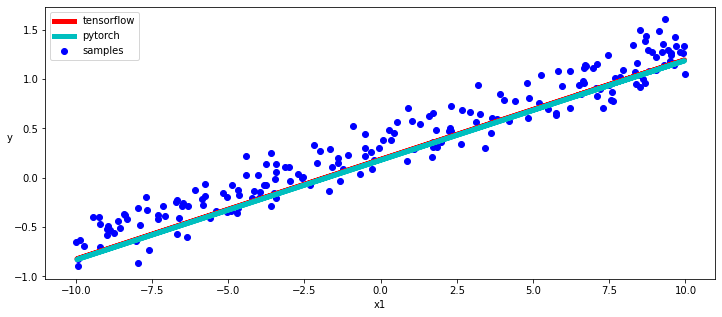

In [14]:
with torch.no_grad():
  x_train, y_train = generate_data()
  plt.figure(figsize = (12,5))
  ax = plt.subplot(111)
  ax.scatter(x_train,y_train, c = "b", label="samples")
  ax.plot(x, tf_model.params["w"] * x + tf_model.params["b"], "r", linewidth = 5.0, label = "tensorflow")
  ax.plot(x, w * inputs + b, "c", linewidth = 5.0, label = "pytorch")
  ax.legend()
  plt.xlabel("x1")
  plt.ylabel("y",rotation = 0)